<ipython-input-1-32d057cc37f4>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


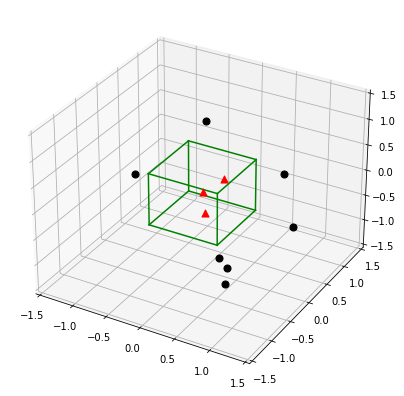

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

# Plot Points 
# samples within the cube

X_inside = np.array([[0,0,0],[0.2,0.2,0.2],[0.1, -0.1, -0.3]])

X_outside = np.array([[-1.2,0.3,-0.3],[0.8,-0.82,-0.9],[1, 0.6, -0.7],
                  [0.8,0.7,0.2],[0.7,-0.8,-0.45],[-0.3, 0.6, 0.9],
                  [0.7,-0.6,-0.8]])

for row in X_inside:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X_outside:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

# Plot Cube 
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

In [2]:
def window_function(x_vec, unit_len=1):
    """
    Implementation of the window function. Returns 1 if 3x1-sample vector
    lies within a origin-centered hypercube, 0 otherwise.

    """
    for row in x_vec:
        if np.abs(row) > (unit_len/2):
            return 0
    return 1

In [3]:
X_all = np.vstack((X_inside,X_outside))
assert(X_all.shape == (10,3))

k_n = 0
for row in X_all:
    k_n += window_function(row.reshape(3,1))

print('Points inside the hypercube:', k_n)
print('Points outside the hybercube:', len(X_all) - k_n)

Points inside the hypercube: 3
Points outside the hybercube: 7


In [4]:
def parzen_window_est(x_samples, h=1, center=[0,0,0]):
    ''' Implementation of the Parzen-window estimation for hypercubes. Keyword arguments: x_samples: A 'n x d'-dimensional numpy array, where each sample is stored in a separate row. h: The length of the hypercube. center: The coordinate center of the hypercube Returns the probability density for observing k samples inside the hypercube. '''
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions)  
    'Number of center coordinates have to match sample dimensions'
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / len(x_samples)) / (h**dimensions)

print('p(x) =', parzen_window_est(X_all, h=1))

p(x) = 0.3


In [5]:
import numpy as np

# Generate 10,000 random 2D-patterns 
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, 10000)

print(x_2Dgauss.shape)

(10000, 2)


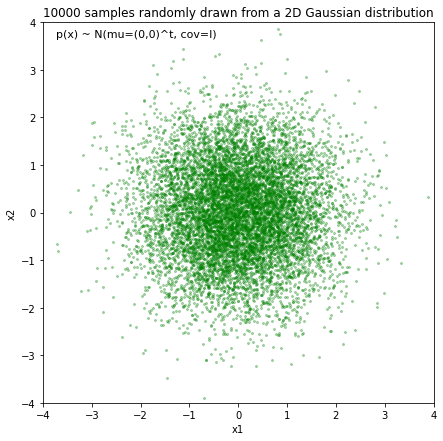

In [6]:
#from matplotlib import pyplot as plt 
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_2Dgauss[:,0], x_2Dgauss[:,1],
        marker='o', color='green', s=4, alpha=0.3)
plt.title('10000 samples randomly drawn from a 2D Gaussian distribution')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x) ~ N(mu=(0,0)^t, cov=I)'
plt.figtext(.15,.85, ftext, fontsize=11, ha='left')
plt.ylim([-4,4])
plt.xlim([-4,4])

plt.show()

In [7]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

<ipython-input-8-ab43c8f47ce9>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
<ipython-input-8-ab43c8f47ce9>:27: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)


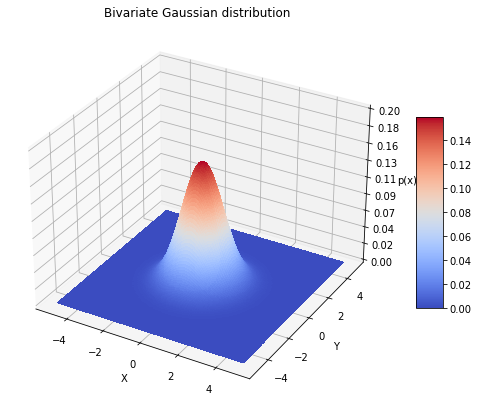

In [8]:
#import numpy as np
#from matplotlib import pyplot as plt

#from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1,
        cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

In [9]:
#import numpy as np 
def pdf_multivariate_gauss(x, mu, cov):
    ''' Caculate the multivariate normal density (pdf) Keyword arguments: x = numpy array of a "d x 1" sample vector mu = numpy array of a "d x 1" mean vector cov = "numpy array of a d x d" covariance matrix '''
    assert(mu.shape[0] > mu.shape[1]),\
        'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]),\
        'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]),\
        'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]),\
        'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]),\
        'mu and x must have the same dimensions'

    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [10]:
#from matplotlib.mlab import bivariate_normal

x = np.array([[0],[0]])
mu = np.array([[0],[0]])
cov = np.eye(2)

mlab_gauss = bivariate_normal(x,x)
mlab_gauss = float(mlab_gauss[0]) # because mlab returns an np.array 
impl_gauss = pdf_multivariate_gauss(x, mu, cov)

print('mlab_gauss:', mlab_gauss)
print('impl_gauss:', impl_gauss)
assert(mlab_gauss == impl_gauss),\
        'Implementations of the mult. Gaussian return different pdfs'

mlab_gauss: 0.15915494309189535
impl_gauss: 0.15915494309189535


In [11]:
print('Predict p(x) at the center [0,0]: ')

print('h = 0.1 ---> p(x) =', parzen_window_est(
        x_2Dgauss, h=0.1, center=[0, 0])
        )
print('h = 0.3 ---> p(x) =',parzen_window_est(
        x_2Dgauss, h=0.3, center=[0, 0])
        )
print('h = 0.6 ---> p(x) =',parzen_window_est(
        x_2Dgauss, h=0.6, center=[0, 0])
        )
print('h = 1 ---> p(x) =',parzen_window_est(
        x_2Dgauss, h=1, center=[0, 0])
        )

Predict p(x) at the center [0,0]: 
h = 0.1 ---> p(x) = 0.17999999999999997
h = 0.3 ---> p(x) = 0.15333333333333335
h = 0.6 ---> p(x) = 0.1413888888888889
h = 1 ---> p(x) = 0.1416


In [12]:
import operator

# generate a range of 400 window widths between 0 < h < 1
h_range = np.linspace(0.001, 1, 400)

# calculate the actual density at the center [0, 0]
mu = np.array([[0],[0]])
cov = np.eye(2)
actual_pdf_val = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)

# get a list of the differnces (|estimate-actual|) for different window widths
parzen_estimates = [np.abs(parzen_window_est(x_2Dgauss, h=i, center=[0, 0])
               - actual_pdf_val) for i in h_range]

# get the window width for which |estimate-actual| is closest to 0
min_index, min_value = min(enumerate(parzen_estimates), key=operator.itemgetter(1))

print('Optimal window width for this data set: ', h_range[min_index])

Optimal window width for this data set:  0.23885714285714288


In [28]:
import prettytable

p1 = parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[0, 0])
p2 = parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[0.5, 0.5])
p3 = parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[0.3, 0.2])

mu = np.array([[0],[0]])
cov = np.eye(2)

a1 = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)
a2 = pdf_multivariate_gauss(np.array([[0.5],[0.5]]), mu, cov)
a3 = pdf_multivariate_gauss(np.array([[0.3],[0.2]]), mu, cov)

results = prettytable.PrettyTable(["", "predicted", "actual"])
results.add_row(["p([0,0]^t",p1, a1])
results.add_row(["p([0.5,0.5]^t",p2, a2])
results.add_row(["p([0.3,0.2]^t",p3, a3])

print(results)

+---------------+---------------------+---------------------+
|               |      predicted      |        actual       |
+---------------+---------------------+---------------------+
|   p([0,0]^t   |  0.1542432636615462 | 0.15915494309189535 |
| p([0.5,0.5]^t | 0.10691862594720816 | 0.12394999430965298 |
| p([0.3,0.2]^t |  0.1367156200636432 | 0.14913891880709737 |
+---------------+---------------------+---------------------+


<ipython-input-15-43d3f9ad8ee3>:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


KeyboardInterrupt: 

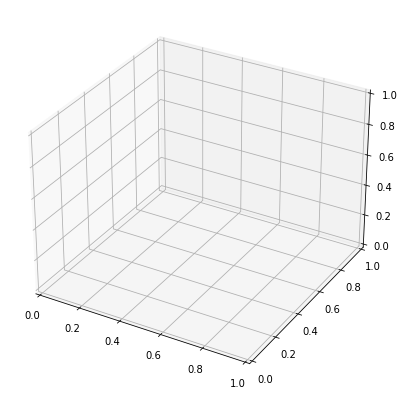

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##############################################
### Predicted bivariate Gaussian densities ###
##############################################

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[i, j]))

Z = np.asarray(Z).reshape(100,100)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Predicted bivariate Gaussian densities')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

###########################################
### Actual bivariate Gaussian densities ###
###########################################

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 100)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
       linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Actual bivariate Gaussian densities')

plt.show()

In [14]:
def hypercube_kernel(h, x, x_i):
    """
    Implementation of a hypercube kernel for Parzen-window estimation.

    Keyword arguments:
        h: window width
        x: point x for density estimation, 'd x 1'-dimensional numpy array
        x_i: point from training sample, 'd x 1'-dimensional numpy array

    Returns a 'd x 1'-dimensional numpy array as input for a window function.

    """
    assert (x.shape == x_i.shape), 'vectors x and x_i must have the same dimensions'
    return (x - x_i) / (h)


def parzen_window_func(x_vec, h=1):
    """
    Implementation of the window function. Returns 1 if 'd x 1'-sample vector
    lies within inside the window, 0 otherwise.

    """
    for row in x_vec:
        if np.abs(row) > (1/2):
            return 0
    return 1


def parzen_estimation(x_samples, point_x, h, d, window_func, kernel_func):
    """
    Implementation of a parzen-window estimation.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row. (= training sample)
        point_x: point x for density estimation, 'd x 1'-dimensional numpy array
        h: window width
        d: dimensions
        window_func: a Parzen window function (phi)
        kernel_function: A hypercube or Gaussian kernel functions

    Returns the density estimate p(x).

    """
    k_n = 0
    for row in x_samples:
        x_i = kernel_func(h=h, x=point_x, x_i=row[:,np.newaxis])
        k_n += window_func(x_i, h=h)
    return (k_n / len(x_samples)) / (h**d)

<ipython-input-15-26e234630c06>:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


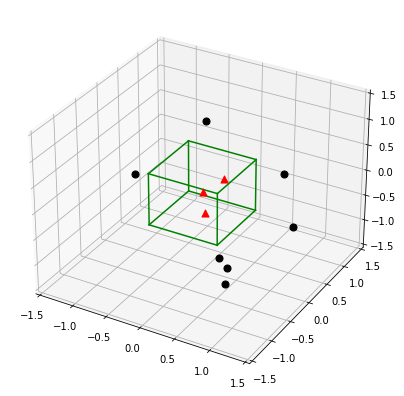

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

# Plot Points

# samples within the cube
X_inside = np.array([[0,0,0],[0.2,0.2,0.2],[0.1, -0.1, -0.3]])

X_outside = np.array([[-1.2,0.3,-0.3],[0.8,-0.82,-0.9],[1, 0.6, -0.7],
                  [0.8,0.7,0.2],[0.7,-0.8,-0.45],[-0.3, 0.6, 0.9],
                  [0.7,-0.6,-0.8]])

for row in X_inside:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X_outside:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

# Plot Cube
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

In [16]:
point_x = np.array([[0],[0],[0]])

print('p(x) =', parzen_estimation(X_all, point_x, h=1, d=3,
                                 window_func=parzen_window_func,
                                 kernel_func=hypercube_kernel
                                 )
     )

p(x) = 0.3


In [17]:
import numpy as np

# Generate 10000 random 2D-patterns
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, 10000)

In [24]:
import prettytable

p1 = parzen_estimation(x_2Dgauss, np.array([[0],[0]]), h=0.3, d=2,
                                 window_func=parzen_window_func,
                                 kernel_func=hypercube_kernel)
p2 = parzen_estimation(x_2Dgauss, np.array([[0.5],[0.5]]), h=0.3, d=2,
                                 window_func=parzen_window_func,
                                 kernel_func=hypercube_kernel)
p3 = parzen_estimation(x_2Dgauss, np.array([[0.3],[0.2]]), h=0.3, d=2,
                                 window_func=parzen_window_func,
                                 kernel_func=hypercube_kernel)

mu = np.array([[0],[0]])
cov = np.eye(2)

a1 = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)
a2 = pdf_multivariate_gauss(np.array([[0.5],[0.5]]), mu, cov)
a3 = pdf_multivariate_gauss(np.array([[0.3],[0.2]]), mu, cov)

results = prettytable.PrettyTable(["", "p(x) predicted", "p(x) actual"])
results.add_row(["p([0,0]^t",p1, a1])
results.add_row(["p([0.5,0.5]^t",p2, a2])
results.add_row(["p([0.3,0.2]^t",p3, a3])

print(results)

+---------------+---------------------+---------------------+
|               |    p(x) predicted   |     p(x) actual     |
+---------------+---------------------+---------------------+
|   p([0,0]^t   |  0.1488888888888889 | 0.15915494309189535 |
| p([0.5,0.5]^t | 0.11777777777777779 | 0.12394999430965298 |
| p([0.3,0.2]^t | 0.15222222222222223 | 0.14913891880709737 |
+---------------+---------------------+---------------------+


In [25]:
# Example evaluating the density at the center

from scipy.stats import kde

density = kde.gaussian_kde(x_2Dgauss.T, bw_method=0.3)
print(density.evaluate(np.array([[0],[0]])))

[0.14701641]


In [29]:
import prettytable

gde = kde.gaussian_kde(x_2Dgauss.T, bw_method=0.3)

results = prettytable.PrettyTable(["", "p(x) hypercube kernel",
    "p(x) Gaussian kernel", "p(x) actual"])
results.add_row(["p([0,0]^t",p1, gde.evaluate(np.array([[0],[0]]))[0], a1])
results.add_row(["p([0.5,0.5]^t",p2, gde.evaluate(np.array([[0.5],[0.5]]))[0], a2])
results.add_row(["p([0.3,0.2]^t",p3, gde.evaluate(np.array([[0.3],[0.2]]))[0], a3])

print(results)

+---------------+-----------------------+----------------------+---------------------+
|               | p(x) hypercube kernel | p(x) Gaussian kernel |     p(x) actual     |
+---------------+-----------------------+----------------------+---------------------+
|   p([0,0]^t   |   0.1542432636615462  | 0.14701641194567358  | 0.15915494309189535 |
| p([0.5,0.5]^t |  0.10691862594720816  |  0.1179332051695934  | 0.12394999430965298 |
| p([0.3,0.2]^t |   0.1367156200636432  | 0.13737545756999095  | 0.14913891880709737 |
+---------------+-----------------------+----------------------+---------------------+


In [22]:
from scipy.stats import kde
import prettytable

mu = np.array([[0],[0]])
cov = np.eye(2)

scott = kde.gaussian_kde(x_2Dgauss.T, bw_method='scott')
silverman = kde.gaussian_kde(x_2Dgauss.T, bw_method='silverman')
scalar = kde.gaussian_kde(x_2Dgauss.T, bw_method=0.3)
actual = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)

results = prettytable.PrettyTable(["", "p([0,0]^t gaussian kernel"])
results.add_row(["bw_method scalar 0.3:", scalar.evaluate(np.array([[0],[0]]))[0]])
results.add_row(["bw_method scott:", scott.evaluate(np.array([[0],[0]]))[0]])
results.add_row(["bw_method silverman:", silverman.evaluate(np.array([[0],[0]]))[0]])
results.add_row(["actual density:", actual])

print(results)

+-----------------------+---------------------------+
|                       | p([0,0]^t gaussian kernel |
+-----------------------+---------------------------+
| bw_method scalar 0.3: |    0.13871572767359822    |
|    bw_method scott:   |     0.1433890252302037    |
|  bw_method silverman: |     0.1433890252302037    |
|    actual density:    |    0.15915494309189535    |
+-----------------------+---------------------------+


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
#from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)


##########################################
### Hypercube kernel density estimates ###
##########################################

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(parzen_estimation(x_2Dgauss, np.array([[i],[j]]), h=0.3, d=2,
                                 window_func=parzen_window_func,
                                 kernel_func=hypercube_kernel))

Z = np.asarray(Z).reshape(100,100)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Hypercube kernel with window width h=0.3')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

#########################################
### Gaussian kernel density estimates ###
#########################################

for bwmethod,t in zip([scalar, scott, silverman], ['scalar h=0.3', 'scott',
        'silverman']):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    Z = bwmethod(np.array([X.ravel(),Y.ravel()]))
    Z = Z.reshape(100,100)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

    ax.set_zlim(0, 0.2)
    ax.zaxis.set_major_locator(plt.LinearLocator(10))
    ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('p(x)')

    plt.title('Gaussian kernel, bw_method %s' %t)
    fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)
    plt.show()



###########################################
### Actual bivariate Gaussian densities ###
###########################################


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')
plt.title('Actual bivariate Gaussian densities')

plt.show()

<ipython-input-26-46771250aaf0>:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


<ipython-input-30-00b1fc612eb3>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\ptpn6\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-00b1fc612eb3>", line 10, in <module>
    Z = Z.reshape(100,100)
ValueError: cannot reshape array of size 40000 into shape (100,100)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\ptpn6\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\ptpn6\appdata\local\programs\python\python39\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_g

TypeError: object of type 'NoneType' has no len()

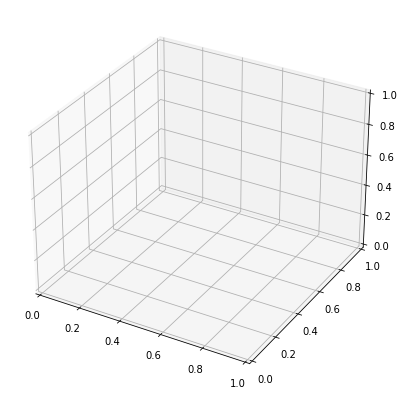

In [30]:
gde_01 = kde.gaussian_kde(x_2Dgauss.T, bw_method=0.01)
gde_5 = kde.gaussian_kde(x_2Dgauss.T, bw_method=0.5)
gde_20 = kde.gaussian_kde(x_2Dgauss.T, bw_method=2)

for bwmethod,t in zip([gde_01, gde_5, gde_20],
        ['scalar h=0.05', 'scalar h=0.5', 'scalar h=2']):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    Z = bwmethod(np.array([X.ravel(),Y.ravel()]))
    Z = Z.reshape(100,100)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

    ax.set_zlim(0, 0.2)
    ax.zaxis.set_major_locator(plt.LinearLocator(10))
    ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('p(x)')

    plt.title('Gaussian kernel, window width h=%s' %t)
    fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)
    plt.show()

<ipython-input-24-c40f8cd56eec>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


ValueError: cannot reshape array of size 40000 into shape (100,100)

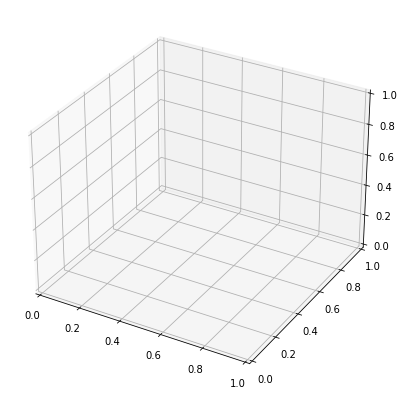

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

Z = gde_5(np.array([X.ravel(),Y.ravel()]))
Z = Z.reshape(100,100)
surf = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4,
    alpha=0.3, label='h = 0.5')

Z = gde_20(np.array([X.ravel(),Y.ravel()]))
Z = Z.reshape(100,100)
surf = ax.plot_wireframe(X, Y, Z, color='red',
    rstride=4, cstride=4, alpha=0.3, label='h = 2')

Z = gde_01(np.array([X.ravel(),Y.ravel()]))
Z = Z.reshape(100,100)
surf = ax.plot_wireframe(X, Y, Z, color='green',
    rstride=4, cstride=4, alpha=0.3, label='h = 0.01')
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')
ax.legend()

plt.title('Gaussian kernel, window width h=%s' %title)

plt.show()

In [31]:
import numpy as np

# Covariance matrices
cov_mats = {}
for i in range(1,4):
    cov_mats[i] = i * np.eye(2)

# mean vectors    
mu_vecs = {}
for i,j in zip(range(1,4), [[0,0], [3,0], [4,5]]):
    mu_vecs[i] = np.array(j).reshape(2,1)

In [32]:
# Example for accessing parameters, e.g., mu_vec and cov_mat for class2
print('mu_vec2\n', mu_vecs[2])
print('cov_mat2\n', cov_mats[2])

mu_vec2
 [[3]
 [0]]
cov_mat2
 [[2. 0.]
 [0. 2.]]


In [33]:
# Generating the random samples
all_samples = {}
for i in range(1,4):
    # generating 40x2 dimensional arrays with random Gaussian-distributed samples
    class_samples = np.random.multivariate_normal(mu_vecs[i].ravel(), cov_mats[i], 40)
    # adding class label to 3rd column
    class_samples = np.append(class_samples, np.zeros((40,1))+i, axis=1)
    all_samples[i] = class_samples

In [34]:
# Dividing the samples into training and test datasets
train_set = np.append(all_samples[1][0:20], all_samples[2][0:20], axis=0)
train_set = np.append(train_set, all_samples[3][0:20], axis=0)

test_set = np.append(all_samples[1][20:40], all_samples[2][20:40], axis=0)
test_set = np.append(test_set, all_samples[3][20:40], axis=0)

assert(train_set.shape == (60, 3))
assert(test_set.shape == (60, 3))


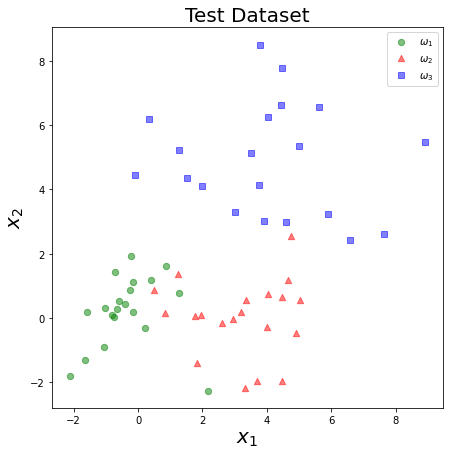

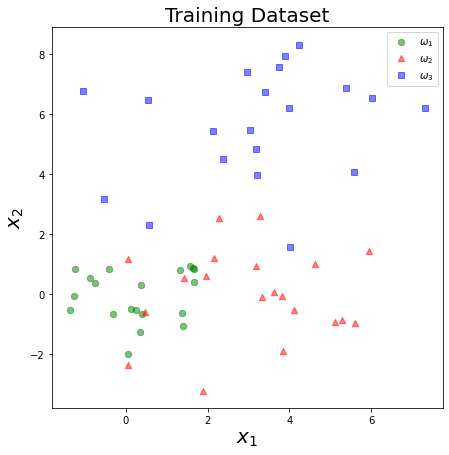

In [35]:
# Visualizing samples by plotting them in a scatter plot

import numpy as np
from matplotlib import pyplot as plt

for dset,title in zip((test_set, train_set), ['Test', 'Training']):
    f, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(dset[dset[:,2] == 1][:,0], dset[dset[:,2] == 1][:,1], \
           marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
    ax.scatter(dset[dset[:,2] == 2][:,0], dset[dset[:,2] == 2][:,1], \
           marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
    ax.scatter(dset[dset[:,2] == 3][:,0], dset[dset[:,2] == 3][:,1], \
           marker='s', color='blue', s=40, alpha=0.5, label='$\omega_3$')
    plt.legend(loc='upper right')
    plt.title('{} Dataset'.format(title), size=20)
    plt.ylabel('$x_2$', size=20)
    plt.xlabel('$x_1$', size=20)
plt.show()

In [36]:
import operator

def bayes_classifier(x_vec, kdes):
    """
    Classifies an input sample into class w_j determined by
    maximizing the class conditional probability for p(x|w_j).

    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        kdes: List of the gausssian_kde (kernel density) estimates

    Returns a tuple ( p(x|w_j)_value, class label ).

    """
    p_vals = []
    for kde in kdes:
        p_vals.append(kde.evaluate(x_vec))
    max_index, max_value = max(enumerate(p_vals), key=operator.itemgetter(1))
    return (max_value, max_index + 1)

In [37]:
from scipy.stats import kde
class1_kde = kde.gaussian_kde(train_set[train_set[:,2] == 1].T[0:2],
        bw_method='scott')
class2_kde = kde.gaussian_kde(train_set[train_set[:,2] == 2].T[0:2],
        bw_method='scott')
class3_kde = kde.gaussian_kde(train_set[train_set[:,2] == 3].T[0:2],
        bw_method='scott')

In [38]:
def empirical_error(data_set, classes, classifier_func, classifier_func_args):
    """
    Keyword arguments:
        data_set: 'n x d'- dimensional numpy array, class label in the last column.
        classes: List of the class labels.
        classifier_func: Function that returns the max argument from the discriminant function.
            evaluation and the class label as a tuple.
        classifier_func_args: List of arguments for the 'classifier_func'.
    
    Returns a tuple, consisting of a dictionary withthe classif. counts and the error.
    
    e.g., ( {1: {1: 321, 2: 5}, 2: {1: 0, 2: 317}}, 0.05)
    where keys are class labels, and values are sub-dicts counting for which class (key)
    how many samples where classified as such.
    
    """
    class_dict = {i:{j:0 for j in classes} for i in classes}

    for cl in classes:
        for row in data_set[data_set[:,-1] == cl][:,:-1]:
            g = classifier_func(row, *classifier_func_args)
            class_dict[cl][g[1]] += 1
    
    correct = 0
    for i in classes:
        correct += class_dict[i][i]
    
    misclass = data_set.shape[0] - correct
    return (class_dict, misclass / data_set.shape[0])

In [39]:
import prettytable

classification_dict, error = empirical_error(test_set, [1,2,3], bayes_classifier,
        [[class1_kde, class2_kde, class3_kde]])

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'test dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+--------------+----------------+----------------+----------------+
| test dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+--------------+----------------+----------------+----------------+
| w1 (actual)  |       17       |       3        |       0        |
| w2 (actual)  |       6        |       14       |       0        |
| w3 (actual)  |       0        |       3        |       17       |
+--------------+----------------+----------------+----------------+
Empirical Error: 0.20 (20.00%)


In [40]:
classification_dict, error = empirical_error(train_set,
        [1,2,3], bayes_classifier, [[class1_kde, class2_kde, class3_kde]])

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'training dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+------------------+----------------+----------------+----------------+
| training dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+------------------+----------------+----------------+----------------+
|   w1 (actual)    |       20       |       0        |       0        |
|   w2 (actual)    |       6        |       14       |       0        |
|   w3 (actual)    |       0        |       1        |       19       |
+------------------+----------------+----------------+----------------+
Empirical Error: 0.12 (11.67%)
